In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
df_diabetes = pd.read_csv(r"C:\Users\João Varella\OneDrive\Área de Trabalho\Programação\Treina Recife - Análise de dados\diabetes (1).csv")

In [3]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_diabetes.shape

(768, 9)

In [6]:
# Renomeando as colunas
df_diabetes.columns = ['Gestações', 'Glicose', 'Pressão_art', 'Espessura_pele', 'Insulina', 'IMC', 'Diabetes%', 'Idade', 'Resultado']

In [7]:
df_diabetes.sample(10)

,Gestações,Glicose,Pressão_art,Espessura_pele,Insulina,IMC,Diabetes%,Idade,Resultado
488,4,99,72,17,0,25.6,0.294,28,0
254,12,92,62,7,258,27.6,0.926,44,1
56,7,187,68,39,304,37.7,0.254,41,1
591,2,112,78,50,140,39.4,0.175,24,0
199,4,148,60,27,318,30.9,0.150,29,1
376,0,98,82,15,84,25.2,0.299,22,0
543,4,84,90,23,56,39.5,0.159,25,0
763,10,101,76,48,180,32.9,0.171,63,0
45,0,180,66,39,0,42.0,1.893,25,1
595,0,188,82,14,185,32.0,0.682,22,1


In [8]:
df_diabetes.describe()

,Gestações,Glicose,Pressão_art,Espessura_pele,Insulina,IMC,Diabetes%,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df_diabetes.isnull().sum()

Gestações         0
Glicose           0
Pressão_art       0
Espessura_pele    0
Insulina          0
IMC               0
Diabetes%         0
Idade             0
Resultado         0
dtype: int64

In [10]:
# Identificando a correlação entre as variáveis
def plot_corr(df_diabetes, size=10):
    corr = df_diabetes.corr()    
    fig, ax = plt.subplots(figsize = (30, 10))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

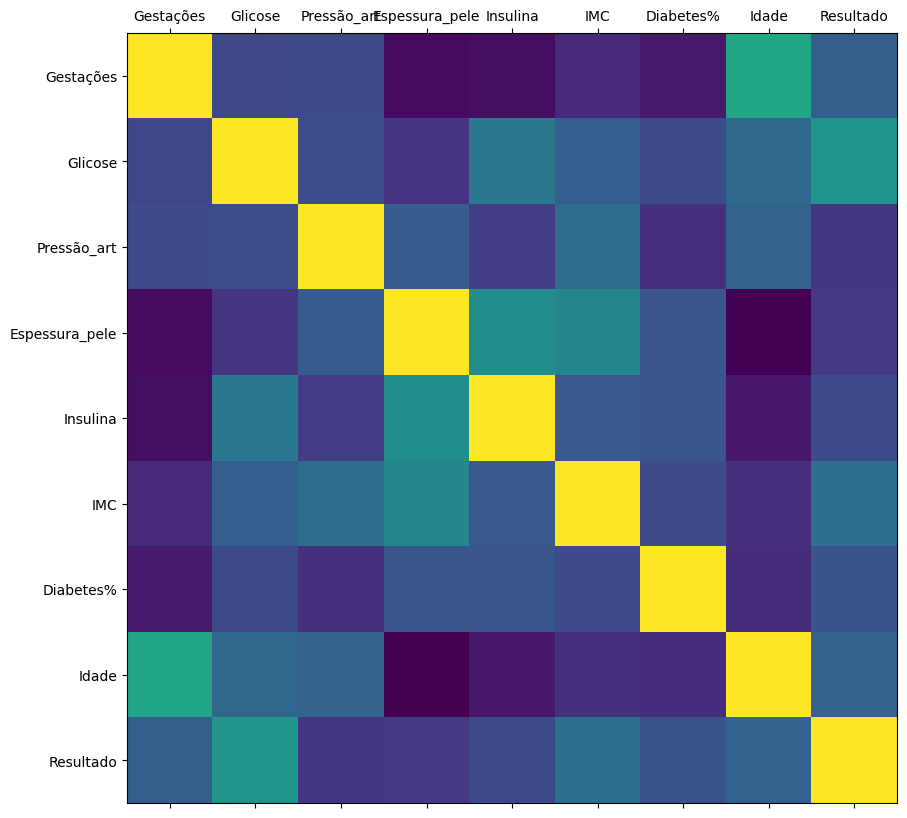

In [11]:
plot_corr(df_diabetes)

In [12]:
# Visualizando a correlação em tabela
'''Coeficiente de correlação: 
+1  = forte correlação positiva
0   = não há correlação
-1  = forte correlação negativa'''

df_diabetes.corr()

,Gestações,Glicose,Pressão_art,Espessura_pele,Insulina,IMC,Diabetes%,Idade,Resultado
Gestações,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pressão_art,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Espessura_pele,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes%,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
# Verificando como os dados estão distribuídos
verdadeiros = len(df_diabetes.loc[df_diabetes['Resultado'] == True])
falsos = len(df_diabetes.loc[df_diabetes['Resultado'] == False])
print('Número de casos verdadeiros: ', verdadeiros)
print('Número de casos falsos: ', falsos)

Número de casos verdadeiros:  268
Número de casos falsos:  500


In [14]:
# Porcentagem de casos verdadeiros e falsos

print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(verdadeiros, (verdadeiros/ (verdadeiros + falsos)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(falsos, (falsos/ (verdadeiros + falsos)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [15]:
# Seleção de variáveis previsoras
atributos = ['Gestações', 'Glicose', 'Pressão_art', 'Espessura_pele', 'Insulina', 'IMC', 'Diabetes%', 'Idade']

# Variável a ser prevista
atrib_prev = ['Resultado']

In [16]:
# Criando objetos
X = df_diabetes[atributos].values
Y = df_diabetes[atrib_prev].values

In [17]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [19]:
# Porcentagem de dados para teste
split_test_size = 0.30

In [20]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, shuffle=True, random_state = 42)

In [21]:
# Utilizando algoritmo Naive Bayes para classificação
from sklearn.naive_bayes import GaussianNB

In [22]:
# Criando o modelo preditivo
modelo_1 = GaussianNB()

In [23]:
modelo_1.fit(X_treino, Y_treino)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
# Verificando a exatidão no modelo nos dados de treino
from sklearn import metrics

In [25]:
nb_predict_train = modelo_1.predict(X_treino)
nb_predict_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [26]:
acuracia = metrics.accuracy_score(Y_treino, nb_predict_train)
print("Acurácia: ", acuracia)

Acurácia:  0.7672253258845437


In [27]:
# Verificando a exatidão no modelo nos dados de teste
nb_predict_test = modelo_1.predict(X_teste)
nb_predict_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
nb_acc_test = metrics.accuracy_score(Y_teste, nb_predict_test)
print("Acurácia: %.4f" %(nb_acc_test))

Acurácia: 0.7446


In [29]:
# Criando uma Matriz de confusão
print("Matriz de confusão")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Relatório de classificação")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Matriz de confusão
[[ 53  27]
 [ 32 119]]

Relatório de classificação
              precision    recall  f1-score   support

           1       0.62      0.66      0.64        80
           0       0.82      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [30]:
# Otimizando o Modelo com RandomForest
from sklearn.ensemble import RandomForestClassifier
modelo_2 = RandomForestClassifier(random_state = 42)
modelo_2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [31]:
# Verificando os dados de treino
rf_predict_train = modelo_2.predict(X_treino)
ac_treino = metrics.accuracy_score(Y_treino, rf_predict_train)
print("Acurácia: %.4f" %(ac_treino))

Acurácia: 1.0000


In [32]:
# Verificando nos dados de teste
rf_predict_test = modelo_2.predict(X_teste)
rf_ac_test = metrics.accuracy_score(Y_teste, rf_predict_test)
print("Acurácia): %.4f" %rf_ac_test)

Acurácia): 0.7532


In [33]:
print("Matriz de confusão")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))


print("\nRelatório de classificação")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Matriz de confusão
[[ 53  27]
 [ 30 121]]

Relatório de classificação
              precision    recall  f1-score   support

           1       0.64      0.66      0.65        80
           0       0.82      0.80      0.81       151

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [34]:
# Regressão logística
from sklearn.linear_model import LogisticRegression

In [35]:
# Versão do modelo usando Regressão Logística
modelo_3 = LogisticRegression(C = 0.5, random_state = 42, max_iter = 100)
modelo_3.fit(X_treino, Y_treino.ravel())
rl_predict_test = modelo_3.predict(X_teste)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
ac_teste_rl = metrics.accuracy_score(Y_teste, rl_predict_test)
print("Acurácia: %.4f" % ac_teste_rl)

print("\nRelatório de classificação")
print(metrics.classification_report(Y_teste, rl_predict_test, labels = [1, 0]))

Acurácia: 0.7359

Relatório de classificação
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        80
           0       0.80      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [37]:
print("Exatidão nos dados de teste\n")

print("Modelo usando algoritmo Naive Bayes:", nb_acc_test)
print("Modelo usando algoritmo Random Forest:", rf_ac_test)
print("Modelo usando algoritmo Regressão Logística:", ac_teste_rl)

Exatidão nos dados de teste

Modelo usando algoritmo Naive Bayes: 0.7445887445887446
Modelo usando algoritmo Random Forest: 0.7532467532467533
Modelo usando algoritmo Regressão Logística: 0.7359307359307359


In [38]:
models = []
models.append(['LR', LogisticRegression(solver='newton-cg')])
models.append(['KNN', KNeighborsClassifier(n_neighbors=1)])
models.append(['CART', DecisionTreeClassifier(max_depth=3,random_state=42)])
models.append(['NB', GaussianNB()])

In [39]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
num_folds = 10
scoring = 'accuracy'

In [41]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_treino, Y_treino, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LR: 0.767028 (0.034594)
KNN: 0.672422 (0.055857)
CART: 0.729799 (0.054195)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

NB: 0.742729 (0.051338)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score =  0.7792207792207793


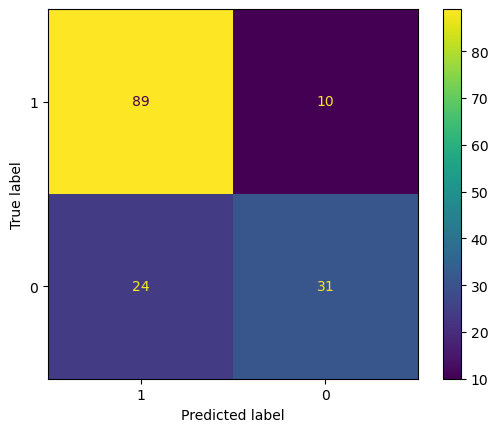

              precision    recall  f1-score   support

           1       0.79      0.90      0.84        99
           0       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [42]:
model =  KNeighborsClassifier(n_neighbors=12)
model.fit(X_treino, Y_treino)

predictions = model.predict(X_teste)
print("Accuracy score = ", accuracy_score(Y_teste, predictions))

# Matriz de confusão
cm = confusion_matrix(Y_teste, predictions)
labels = ['1','0']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(Y_teste, predictions, target_names=labels))

In [43]:
# Conclusão: O modelo com maior acurácia foi o KNN utilizando 12 ou 16 vizinhos.